In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import random
from scipy import stats


from sklearn.model_selection import train_test_split, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold,  StratifiedShuffleSplit

from tqdm.notebook import tqdm ,tnrange
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:

# Python Method 1 : Displays Data Information :
# Need to convert float64 to int for Catboost Classifier
def display_data_information(data, data_types, dataframe_name):
    print(" Information of ",dataframe_name,": Rows = ",data.shape[0],"| Columns = ",data.shape[1],"\n")
    data.info()
    print("\n")
    for VARIABLE in data_types :
        data_type = data.select_dtypes(include=[ VARIABLE ]).dtypes
        if len(data_type) > 0 :
            print(str(len(data_type))+" "+VARIABLE+" Features\n"+str(data_type)+"\n"  )        

# Display Data Information of "train" :

data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(train, data_types, "train")

 Information of  train : Rows =  31647 | Columns =  18 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month     

In [4]:
def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    display(data.head(head_rows).append(data.tail(tail_rows)))
display_head_tail(train, 5, 5)

'Data Head & Tail :'

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0
31646,id_1723,38.0,technician,single,tertiary,no,1045.0,no,no,cellular,18,aug,183.0,10.0,NaN,0,unknown,0


In [5]:
# Python Method 3 : Displays Data Description using Statistics :

def display_data_description(data, numeric_data_types, categorical_data_types):
    
    print("Data Description :")
    display(data.describe( include = numeric_data_types))
    print("")
    display(data.describe( include = categorical_data_types))

# Display Data Description of "train" :
data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]

display_data_description(train, data_types[0:4], data_types[4:7])

Data Description :


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


,id,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,prev_campaign_outcome
count,31647,31647,31497,31647,31647,31647,31498,31647,31647,31647
unique,31647,12,3,4,2,2,2,3,12,4
top,id_28024,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,1,6816,18945,16247,31094,17700,26463,20480,9685,25833


In [6]:
# Python Method 4 : Removes Data Duplicates while Retaining the First one - Similar to SQL DISTINCT :
# All rows are unique
def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0])
    
    return data
remove_duplicate(train)

BEFORE REMOVING DUPLICATES - No. of Rows =  31647
AFTER REMOVING DUPLICATES  - No. of Rows =  31647


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


In [7]:
# Python Method 5 : Displays Unique Values in Each Column of the Dataframe(Table) :

def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
#         print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
#         print("NULL Values :")
#         print(data[ column ].isnull().sum())
        print("Value Counts :")
        print(data[column].value_counts())
        print("")
        
# Displays Unique Values in Each Column of "train" :
# Check "train" data for Values of each Column - Long Form :

display_unique(train)

No of Unique Values in id Column are : 31647
Value Counts :
id_28024    1
id_13773    1
id_468      1
id_20517    1
id_4692     1
           ..
id_28532    1
id_21546    1
id_13661    1
id_18710    1
id_1786     1
Name: id, Length: 31647, dtype: int64

No of Unique Values in customer_age Column are : 77
Value Counts :
34.0    1369
33.0    1344
32.0    1312
31.0    1258
36.0    1223
        ... 
95.0       1
92.0       1
93.0       1
89.0       1
97.0       1
Name: customer_age, Length: 77, dtype: int64

No of Unique Values in job_type Column are : 12
Value Counts :
blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
unknown           199
Name: job_type, dtype: int64

No of Unique Values in marital Column are : 3
Value Counts :
married     18945
single       8857
divorced     3695
Name: marital, dtyp

In [8]:
def fill_missing_values(data, fill_value, fill_types, columns, dataframe_name):
    
    print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())
    for column in columns :
        
        # Fill Missing Values with Specific Value :
        if "Value_Fill" in fill_types :
            data[ column ] = data[ column ].fillna(fill_value)
#             print("Value_Fill")

        # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) :
        if "Forward_Fill" in fill_types :
            data[ column ] = data[ column ].ffill(axis = 0)
#             print("Forward_Fill")

        # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) :
        if "Backward_Fill" in fill_types :
            data[ column ] = data[ column ].bfill(axis = 0)
#             print("Backward_Fill")
    
    print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())
    
    return data

In [9]:
train.isna().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [10]:
test.isna().sum()

id                                      0
customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

In [13]:
fill_types = [ "Forward_Fill", "Value_Fill", "Backward_Fill"]
fill_value_customer_age = data['customer_age'].median()
fill_value_marital = data['marital'].mode()[0]
fill_value_balance = data['balance'].mode()[0]
fill_value_personal_loan = data['personal_loan'].mode()[0]
fill_value_lastcd = data['last_contact_duration'].median()
fill_value_numcc = data['num_contacts_in_campaign'].median()
fill_value_dsc = data['days_since_prev_campaign_contact'].median()

train = fill_missing_values(train, fill_value_customer_age, fill_types[2], ["customer_age"],"train")
train = fill_missing_values(train, fill_value_marital, fill_types[2], ["marital"],"train")
train = fill_missing_values(train, fill_value_balance, fill_types[2], ["balance"],"train")
train = fill_missing_values(train, fill_value_personal_loan, fill_types[2], ["personal_loan"],"train")
train = fill_missing_values(train, fill_value_lastcd, fill_types[2], ["last_contact_duration"],"train")
train = fill_missing_values(train, fill_value_numcc, fill_types[2], ["num_contacts_in_campaign"],"train")
train = fill_missing_values(train, fill_value_dsc, fill_types[2], ["days_since_prev_campaign_contact"],"train")

test = fill_missing_values(test, fill_value_customer_age, fill_types[2], ["customer_age"],"train")
test = fill_missing_values(test, fill_value_marital, fill_types[2], ["marital"],"train")
test = fill_missing_values(test, fill_value_balance, fill_types[2], ["balance"],"train")
test = fill_missing_values(test, fill_value_personal_loan, fill_types[2], ["personal_loan"],"train")
test = fill_missing_values(test, fill_value_lastcd, fill_types[2], ["last_contact_duration"],"train")
test = fill_missing_values(test, fill_value_numcc, fill_types[2], ["num_contacts_in_campaign"],"train")
test = fill_missing_values(test, fill_value_dsc, fill_types[2], ["days_since_prev_campaign_contact"],"train")

Missing Values BEFORE REMOVAL in  train  data


id                                    0
customer_age                        619
job_type                              0
marital                             150
education                             0
default                               0
balance                             399
housing_loan                          0
personal_loan                       149
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               311
num_contacts_in_campaign            112
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
term_deposit_subscribed               0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                             150
education                             0
default                               0
balance                             399
housing_loan                          0
personal_loan                       149
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               311
num_contacts_in_campaign            112
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
term_deposit_subscribed               0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                             150
education                             0
default                               0
balance                             399
housing_loan                          0
personal_loan                       149
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               311
num_contacts_in_campaign            112
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
term_deposit_subscribed               0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                               0
education                             0
default                               0
balance                             399
housing_loan                          0
personal_loan                       149
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               311
num_contacts_in_campaign            112
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
term_deposit_subscribed               0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                               0
education                             0
default                               0
balance                             399
housing_loan                          0
personal_loan                       149
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               311
num_contacts_in_campaign            112
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
term_deposit_subscribed               0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                               0
education                             0
default                               0
balance                               0
housing_loan                          0
personal_loan                       149
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               311
num_contacts_in_campaign            112
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
term_deposit_subscribed               0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                               0
education                             0
default                               0
balance                               0
housing_loan                          0
personal_loan                       149
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               311
num_contacts_in_campaign            112
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
term_deposit_subscribed               0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                               0
education                             0
default                               0
balance                               0
housing_loan                          0
personal_loan                         0
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               311
num_contacts_in_campaign            112
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
term_deposit_subscribed               0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                               0
education                             0
default                               0
balance                               0
housing_loan                          0
personal_loan                         0
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               311
num_contacts_in_campaign            112
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
term_deposit_subscribed               0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                               0
education                             0
default                               0
balance                               0
housing_loan                          0
personal_loan                         0
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration                 0
num_contacts_in_campaign            112
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
term_deposit_subscribed               0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                               0
education                             0
default                               0
balance                               0
housing_loan                          0
personal_loan                         0
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration                 0
num_contacts_in_campaign            112
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
term_deposit_subscribed               0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


id                                    0
customer_age                        270
job_type                              0
marital                              81
education                             0
default                               0
balance                             181
housing_loan                          0
personal_loan                        74
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               122
num_contacts_in_campaign             45
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                              81
education                             0
default                               0
balance                             181
housing_loan                          0
personal_loan                        74
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               122
num_contacts_in_campaign             45
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                              81
education                             0
default                               0
balance                             181
housing_loan                          0
personal_loan                        74
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               122
num_contacts_in_campaign             45
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                               0
education                             0
default                               0
balance                             181
housing_loan                          0
personal_loan                        74
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               122
num_contacts_in_campaign             45
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                               0
education                             0
default                               0
balance                             181
housing_loan                          0
personal_loan                        74
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               122
num_contacts_in_campaign             45
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                               0
education                             0
default                               0
balance                               0
housing_loan                          0
personal_loan                        74
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               122
num_contacts_in_campaign             45
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                               0
education                             0
default                               0
balance                               0
housing_loan                          0
personal_loan                        74
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               122
num_contacts_in_campaign             45
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                               0
education                             0
default                               0
balance                               0
housing_loan                          0
personal_loan                         0
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               122
num_contacts_in_campaign             45
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


id                                    0
customer_age                          0
job_type                              0
marital                               0
education                             0
default                               0
balance                               0
housing_loan                          0
personal_loan                         0
communication_type                    0
day_of_month                          0
month                                 0
last_contact_duration               122
num_contacts_in_campaign             45
days_since_prev_campaign_contact      0
num_contacts_prev_campaign            0
prev_campaign_outcome                 0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


id                                   0
customer_age                         0
job_type                             0
marital                              0
education                            0
default                              0
balance                              0
housing_loan                         0
personal_loan                        0
communication_type                   0
day_of_month                         0
month                                0
last_contact_duration                0
num_contacts_in_campaign            45
days_since_prev_campaign_contact     0
num_contacts_prev_campaign           0
prev_campaign_outcome                0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


id                                   0
customer_age                         0
job_type                             0
marital                              0
education                            0
default                              0
balance                              0
housing_loan                         0
personal_loan                        0
communication_type                   0
day_of_month                         0
month                                0
last_contact_duration                0
num_contacts_in_campaign            45
days_since_prev_campaign_contact     0
num_contacts_prev_campaign           0
prev_campaign_outcome                0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
dtype: int64

In [14]:
train['days_since_prev_campaign_contact'] = train['days_since_prev_campaign_contact'].fillna(182.0)
test['days_since_prev_campaign_contact'] = test['days_since_prev_campaign_contact'].fillna(182.0)

train.isna().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64

In [16]:
test.isna().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
dtype: int64

# Feature Engineering

In [20]:
train

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,182.0,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,182.0,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,182.0,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,182.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,182.0,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,182.0,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,182.0,0,unknown,0


In [21]:
test

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,182.0,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,182.0,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,182.0,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,182.0,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,182.0,0,unknown
13560,id_14483,45.0,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,182.0,0,unknown
13561,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,182.0,0,unknown
13562,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure


In [23]:
num_cols = ['customer_age', 'balance', 'day_of_month', 'last_contact_duration', 
            'days_since_prev_campaign_contact',  'num_contacts_in_campaign',
           'num_contacts_prev_campaign']
cat_cols = ['job_type', 'marital', 'education', 'default', 'housing_loan',
           'personal_loan', 'communication_type', 'month', 'prev_campaign_outcome']

In [24]:
id_test = test['id']
ss = StandardScaler()
train[num_cols] = ss.fit_transform(train[num_cols])
test[num_cols] = ss.fit_transform(test[num_cols])

In [473]:
# Target Encoding did not work well
"""def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)"""

IndentationError: unexpected indent (<ipython-input-473-cf70b661e842>, line 12)

In [474]:
"""train_job_type, test_job_type = target_encode(train["job_type"],
                                              test['job_type'],
                                              target=train.term_deposit_subscribed, 
                                              min_samples_leaf=100,
                                              smoothing=10,
                                              noise_level=0.01)
train['job_type_te']=train_job_type
test['job_type_te']=test_job_type"""

'train_job_type, test_job_type = target_encode(train["job_type"],\n                                              test[\'job_type\'],\n                                              target=train.term_deposit_subscribed, \n                                              min_samples_leaf=100,\n                                              smoothing=10,\n                                              noise_level=0.01)\ntrain[\'job_type_te\']=train_job_type\ntest[\'job_type_te\']=test_job_type'

In [282]:
"""train_marital, test_marital = target_encode(train["marital"],
                                              test['marital'],
                                              target=train.term_deposit_subscribed, 
                                              min_samples_leaf=100,
                                              smoothing=10,
                                              noise_level=0.01)
train['marital_te']=train_marital
test['marital_te']=test_marital"""

In [283]:
"""train_education, test_education = target_encode(train["education"],
                                              test['education'],
                                              target=train.term_deposit_subscribed, 
                                              min_samples_leaf=100,
                                              smoothing=10,
                                              noise_level=0.01)
train['education_te']=train_education
test['education_te']=test_education"""

In [284]:
"""train_default, test_default = target_encode(train["default"],
                                              test['default'],
                                              target=train.term_deposit_subscribed, 
                                              min_samples_leaf=100,
                                              smoothing=10,
                                              noise_level=0.01)
train['default_te']=train_default
test['default_te']=test_default"""

In [288]:
"""train_personal_loan, test_personal_loan = target_encode(train["personal_loan"],
                                              test['personal_loan'],
                                              target=train.term_deposit_subscribed, 
                                              min_samples_leaf=100,
                                              smoothing=10,
                                              noise_level=0.01)
train['personal_loan_te']=train_personal_loan
test['personal_loan_te']=test_personal_loan"""

In [286]:
"""train_housing_loan, test_housing_loan = target_encode(train["housing_loan"],
                                              test['housing_loan'],
                                              target=train.term_deposit_subscribed, 
                                              min_samples_leaf=100,
                                              smoothing=10,
                                              noise_level=0.01)
train['housing_loan_te']=train_housing_loan
test['housing_loan_te']=test_housing_loan"""

In [290]:
"""train_ctype, test_ctype = target_encode(train["communication_type"],
                                              test['communication_type'],
                                              target=train.term_deposit_subscribed, 
                                              min_samples_leaf=100,
                                              smoothing=10,
                                              noise_level=0.01)
train['communication_type_te']=train_ctype
test['communication_type_te']=test_ctype"""

In [292]:
"""train_month, test_month = target_encode(train["month"],
                                              test['month'],
                                              target=train.term_deposit_subscribed, 
                                              min_samples_leaf=100,
                                              smoothing=10,
                                              noise_level=0.01)
train['month_te']=train_ctype
test['month_te']=test_ctype"""

In [293]:
""""train_prev_campaign_outcome, test_prev_campaign_outcome = target_encode(train["prev_campaign_outcome"],
                                              test['prev_campaign_outcome'],
                                              target=train.term_deposit_subscribed, 
                                              min_samples_leaf=100,
                                              smoothing=10,
                                              noise_level=0.01)
train['prev_campaign_outcome_te']=train_prev_campaign_outcome
test['prev_campaign_outcome_te']=test_prev_campaign_outcome""""

In [25]:
final_train = pd.get_dummies(columns=cat_cols, data=train)
final_test = pd.get_dummies(columns=cat_cols, data=test)
final_train

,id,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed,job_type_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,id_43823,-1.157617,-0.351407,1.223313,0.183543,0.388420,-0.151869,-0.236683,0,0,...,1,0,0,0,0,0,0,0,0,1
1,id_32289,-0.598891,-0.140736,0.262103,-0.441798,-0.246170,-1.112877,0.163376,0,0,...,0,0,0,1,0,0,0,1,0,0
2,id_10523,0.518561,-0.230977,-1.299864,-0.605949,0.388420,-0.151869,-0.236683,0,0,...,0,0,0,0,0,0,0,0,0,1
3,id_43951,-0.598891,-0.443271,0.502405,-0.504332,0.071125,-0.151869,-0.236683,0,0,...,0,0,1,0,0,0,0,0,0,1
4,id_40992,0.052956,-0.005049,-0.338654,-0.809185,-0.246170,-0.151869,-0.236683,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,1.636013,-0.259867,-1.660318,-0.613766,-0.246170,1.443405,0.963492,0,1,...,0,0,0,0,0,0,0,1,0,0
31643,id_20428,0.984166,-0.095940,0.502405,-0.879536,1.340307,-0.151869,-0.236683,0,0,...,1,0,0,0,0,0,0,0,0,1
31644,id_44679,0.052956,-0.365365,0.862859,-0.652850,-0.246170,-0.151869,-0.236683,0,0,...,0,0,1,0,0,0,0,0,0,1
31645,id_4841,0.704803,0.432199,-0.578956,-0.156486,1.023011,-0.151869,-0.236683,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
#final_train = data.loc[data['source']=='train']
#final_test = data.loc[data['source']=='test']
y = final_train['term_deposit_subscribed']
id_test = final_test['id']
X = final_train.drop(columns=['id','term_deposit_subscribed'], axis=1)
final_test = final_test.drop(columns=['id'], axis=1)

In [27]:
def feature_importance(model, X_train):

    plt.figure(figsize=(20,20))
    fI = model.feature_importances_
    
    print(fI)
    
    names = X_train.columns.values
    
    ticks = [i for i in range(len(names))]
    
    plt.bar(ticks, fI)
    
    plt.xticks(ticks, names,rotation = 90)
    
    plt.show()

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

smote = SMOTE()
X, y = smote.fit_sample(X, y)
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
i=1
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     model = XGBClassifier(n_estimators=1000,
                           max_depth=6,
                           learning_rate=0.05,
                            subsample=0.9,
                            colsample_bytree=0.35,
                            objective='binary:logistic',
                            random_state=1)
     model.fit(xtr, ytr)
     pred=model.predict(xvl)
     if i==0:
            feature_importance(model,X_train)
     print('F1_score',f1_score(yvl,pred))
     i+=1


1 of kfold 10
F1_score 0.9509943181818182

2 of kfold 10
F1_score 0.9569209039548022

3 of kfold 10
F1_score 0.9593524546894246

4 of kfold 10
F1_score 0.9536938847649346

5 of kfold 10
F1_score 0.9545133991537377

6 of kfold 10
F1_score 0.9546572934973638

7 of kfold 10
F1_score 0.9587683595823748

8 of kfold 10
F1_score 0.9558118899733806

9 of kfold 10
F1_score 0.9605658709106986

10 of kfold 10
F1_score 0.9565371024734983


In [299]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

smote = SMOTE()
X, y = smote.fit_sample(X, y)
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     model = XGBClassifier(n_estimators=1000,
                           max_depth=6,
                           learning_rate=0.05,
                            subsample=0.9,
                            colsample_bytree=0.35,
                            objective='binary:logistic',
                            random_state=1)
     model.fit(xtr, ytr)
     pred=model.predict(xvl)
     if i==0:
            feature_importance(model,X_train)
     print('F1_score',f1_score(yvl,pred))
     i+=1


54 of kfold 10
F1_score 0.957736516357206

55 of kfold 10
F1_score 0.9529702970297029

56 of kfold 10
F1_score 0.9610115911485774

57 of kfold 10
F1_score 0.9557709251101322

58 of kfold 10
F1_score 0.9587592527317589

59 of kfold 10
F1_score 0.9548885378269264

60 of kfold 10
F1_score 0.9602695991486343

61 of kfold 10
F1_score 0.9591511936339523

62 of kfold 10
F1_score 0.9585172109443953

63 of kfold 10
F1_score 0.9587301587301587


 
####################################################################################################
Seed 1
Fold 0
Rows of Train=  22152 Rows of Holdout =  9495
[0]	validation_0-auc:0.72200	validation_0-logloss:0.66065
Multiple eval metrics have been passed: 'validation_0-logloss' will be used for early stopping.

Will train until validation_0-logloss hasn't improved in 1000 rounds.
[100]	validation_0-auc:0.94793	validation_0-logloss:0.19294
[200]	validation_0-auc:0.95011	validation_0-logloss:0.17418
[300]	validation_0-auc:0.95097	validation_0-logloss:0.17022
[400]	validation_0-auc:0.95137	validation_0-logloss:0.16885
[500]	validation_0-auc:0.95106	validation_0-logloss:0.16924
[600]	validation_0-auc:0.95097	validation_0-logloss:0.16935
[700]	validation_0-auc:0.95079	validation_0-logloss:0.16969
[800]	validation_0-auc:0.95093	validation_0-logloss:0.17013
[900]	validation_0-auc:0.95070	validation_0-logloss:0.17090
[999]	validation_0-auc:0.95066	validation_0-logloss:0.17169
ROC_AUC=  0.

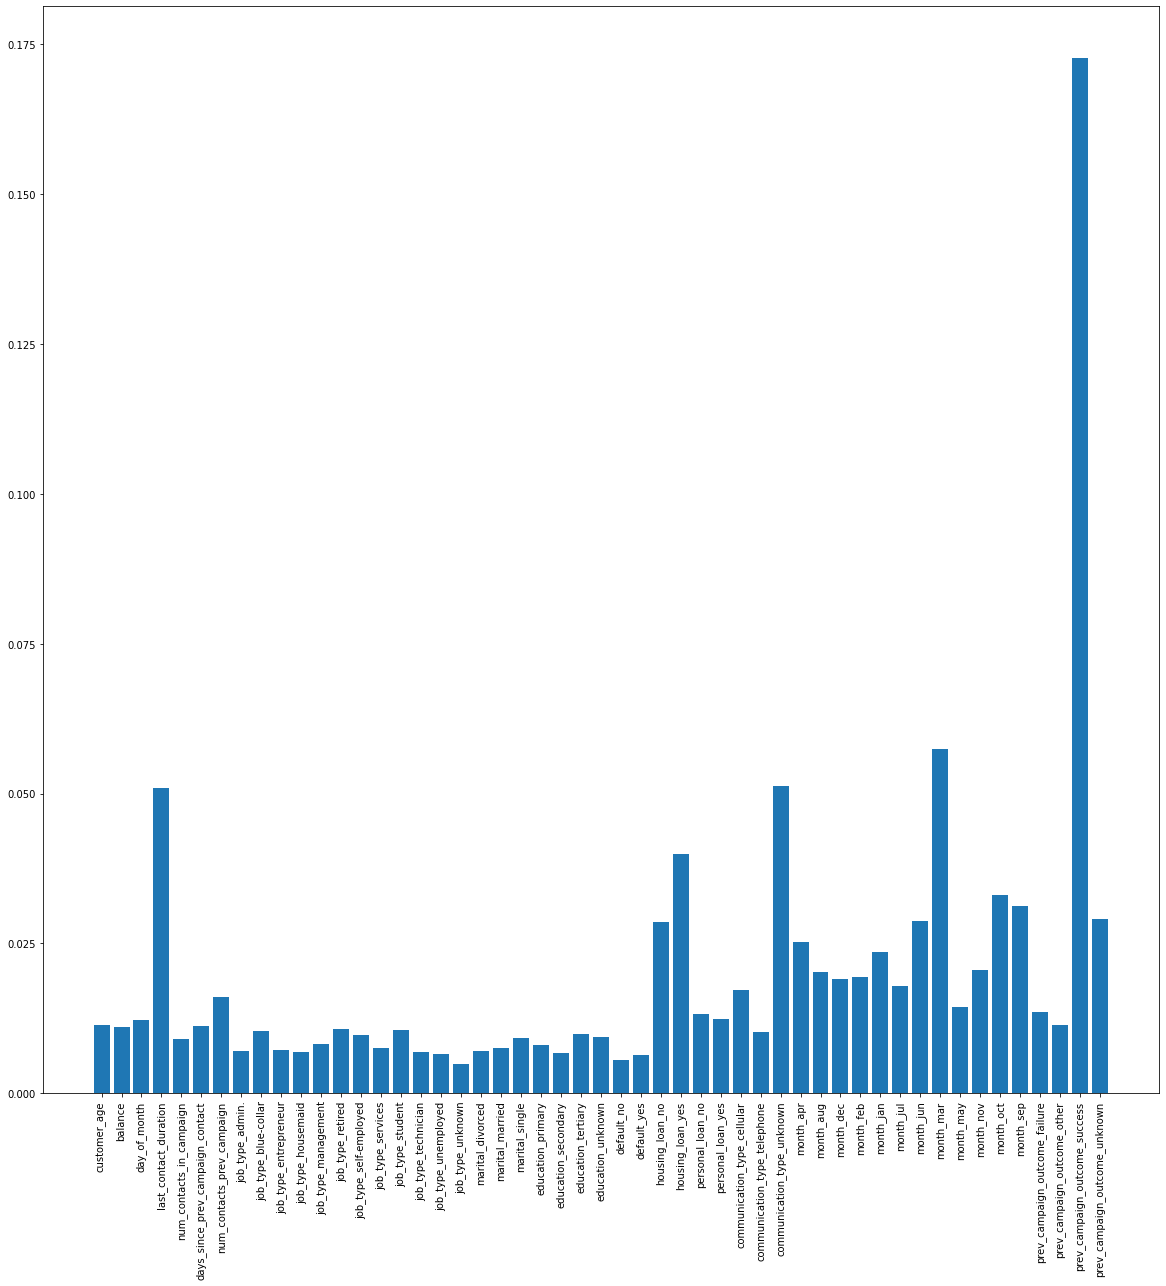

Fold 1
Rows of Train=  22152 Rows of Holdout =  9495
[0]	validation_0-auc:0.71703	validation_0-logloss:0.66065
Multiple eval metrics have been passed: 'validation_0-logloss' will be used for early stopping.

Will train until validation_0-logloss hasn't improved in 1000 rounds.
[100]	validation_0-auc:0.94520	validation_0-logloss:0.19641
[200]	validation_0-auc:0.94883	validation_0-logloss:0.17639
[300]	validation_0-auc:0.95000	validation_0-logloss:0.17209
[400]	validation_0-auc:0.95027	validation_0-logloss:0.17089
[500]	validation_0-auc:0.95012	validation_0-logloss:0.17115
[600]	validation_0-auc:0.95016	validation_0-logloss:0.17130
[700]	validation_0-auc:0.94986	validation_0-logloss:0.17216
[800]	validation_0-auc:0.94965	validation_0-logloss:0.17286
[900]	validation_0-auc:0.94941	validation_0-logloss:0.17371
[999]	validation_0-auc:0.94928	validation_0-logloss:0.17469
ROC_AUC=  0.950360538732681
##############################################################################################

In [113]:
# XGBoost Classifier
probs_xgb = np.zeros(shape=(len(final_test)))
scores = []
avg_loss = []

X_train, y_train = X, y
seeds = [1]

for seed in tnrange(len(seeds)):
    print(' ')
    print('#'*100)
    print('Seed', seeds[seed])
    sf = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=seed)
    for i, (idxT, idxV) in enumerate(sf.split(X_train, y_train)):
        print('Fold', i)
        print('Rows of Train= ', len(idxT), 'Rows of Holdout = ', len(idxV))
        clf = XGBClassifier(n_estimators=1000,
                           max_depth=6,
                           learning_rate=0.05,
                            subsample=0.9,
                            colsample_bytree=0.35,
                            objective='binary:logistic',
                            random_state=1)
        preds = clf.fit(X_train.iloc[idxT], y_train.iloc[idxT],
                       eval_set=[(X_train.iloc[idxV], y_train.iloc[idxV])],
                       verbose=100, eval_metric=['auc', 'logloss'],
                       early_stopping_rounds=1000)
        probs_oof = clf.predict_proba(X_train.iloc[idxV])[:,1]
        probs_xgb += clf.predict_proba(final_test)[:,1]
        roc = roc_auc_score(y_train.iloc[idxV], probs_oof)
        scores.append(roc)
        avg_loss.append(clf.best_score)
        print("ROC_AUC= ", roc)
        print('#'*100)
        if i==0:
            feature_importance(clf,X_train)
        
print("Loss= {0:0.5f}, {1:0.5f}".format(np.array(avg_loss).mean(), np.array(avg_loss).std()))
print('%.6f (%.6f)' % (np.array(scores).mean(), np.array(scores).std()))

In [30]:
sample = pd.read_csv("sample.csv")
sample['id'] = id_test
predictions = model.predict(final_test)
sample['term_deposit_subscribed'] = predictions
#sample['target'] = (probs_lgbm)/4
sample.to_csv('submission2.csv',index =False)